# SpinLaunch Chipsat Experiment
#### V. Hunter Adams (vha3@cornell.edu)

In [35]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

> - [What question are we asking, and what was the answer?](#What-question-are-we-asking,-and-what-was-the-answer?)
> - [Why are we conducting an experiment to answer this question?](#Why-are-we-conducting-an-experiment-to-answer-this-question?)
> - [What are the implications of the results?](#What-are-the-implications-of-the-results?)
> - [Experimental method](#Experimental-method)
> - [Sensor data before and after launch](#Sensor-data-before-and-after-launch)
> - [A discussion of the day's events](#A-discussion-of-the-day's-events)

***

## What question are we asking, and what was the answer?

**Question**: Is there a non-negligible probability that a chipsat will survive spinup and launch from SpinLaunch's Suborbital Accelerator, deployment from the launch payload, freefall, and impact with the ground?<br><br>
**Answer**: Yes!<br><br>

<table><tr>
<td> <img src="Accelerator.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="chipsat.png" alt="Drawing" style="width: 500px;"/> </td>
    </tr><caption>Suborbital Accelerator and a chipsat</caption></table>

## Why are we conducting an experiment to answer this question?

You might call this an "experimental experiment." It is an experiment to determine what future experiments will be possible with chipsats in the Suborbital Accelerator.

Centimeter-scale spacecraft will be a critical tool in future planetary science missions. Deployed *en masse* from orbit, chipsats will descend through the atmosphere and down to the surface of this planet and others, gathering spatially distributed datasets as they fall, and communicating data from the surface once they land. As a collective, these chipsats will generate datasets with the spatial breadth that we typically only associate with remote sensing, but with the *in situ* depth that we typically only associate with rovers. You can read about chipsats in detail [here](https://vanhunteradams.com/Papers/R-selected.pdf) and [here](https://vanhunteradams.com/Papers/Thesis.pdf), or listen to me talk about them [here](https://www.youtube.com/watch?v=2AEwKotldIY&list=PLDqMkB5cbBA7iKXV4M0BJYe58dFeFdFE0&index=2&t=163s).

To plan these missions, we must understand the chaotic trajectories that low-mass and high-surface area objects take from the top of the atmosphere to the surface of the planet. This understanding will help us answer questions related to the missions. For example: "How well can we aim at an area of interest on a planetary surface?" and "To what extent should we expect for the chipsats to spread out as they fall?" The best way to gain this understanding of their trajectories is to conduct experiments, and SpinLaunch’s suborbital accelerator is the greatest enabler of experiments of this variety that has ever existed. 

With SpinLaunch’s suborbital accelerator, we can gather critical information for planning future planetary science missions involving chipsats. To conduct these experiments, we must first confirm that chipsats can survive spinup, launch, deployment, and landing. Our test on September 27, 2022 confirmed that they do indeed have a reasonable probability of survival.

## What are the implications of the results?

We now have confidence that chipsats will survive spinup, launch, deployment, and terminal-velocity impact with Earth. We can plan additional experiments which study the trajectories of the chipsats as they fall, and the extent to which we can control and/or add determinism to those trajectories. The results of these experiments will be used to plan missions to other celestial bodies. We may, for instance, use chipsats to extract data from cracks in the ice on Europa, to look for life on Enceladus, or to learn more about hard-to-reach places on our own planet.

## Experimental method

Our test was very simple:

1. Gather 200 independent measurements from each sensor on a chipsat (accelerometer, magnetometer, gyroscope, front light sensor, and rear light sensor). Confirm that each sensor is operating to within datasheet specifications.
> - [LSM9DS1 datasheet](https://www.st.com/resource/en/datasheet/lsm9ds1.pdf)
> - [Light sensor](https://www.digikey.com/en/products/detail/everlight-electronics-co-ltd/ALS-PT19-315C-L177-TR8/2675735)
2. Spinup, launch, deploy, and recover a chipsat.
3. Gather 200 independent measurements from each sensor on the chipsat (accelerometer, magnetometer, gyroscope, front light sensor, and rear light sensor). Confirm that each sensor is *still* operating to within datasheet specifications.

Note that the setup for data acquisition (described [here](./Spinlaunch_setup.html)) does not hold the chipsat in an ultra-precise attitude, nor does it control for ambient light in the room or ambient magnetic fields. For that reason, we can expect for the mean of the distributions for each sensor to shift. All that we want to confirm is that the data is within datasheet specifications for bias and noise levels.

## Sensor data before and after launch
The means of some of these distributions have changed slightly due to differing orientations when gathering the data (and some gyro bias), and due to a different electromagnetic environment, but all sensors are performing to within their specifications.

If you'd like to study the data yourself, the before-launch data is available [here](./Spinlaunch_prior/16.txt) and the after-launch data is available [here](./Spinlaunch_posterior/16.txt).

In [41]:
# Import libraries

import os
import matplotlib.pyplot as plt
import numpy

# Import data

chipsat_12_prior = [ [], [], [], [], [], [], [], [], [], [], []]
with open('./Spinlaunch_prior/16.txt', "rt") as f:
    for line in f:
        try:
            if len(line.split(',')) == 12:
                chipsat_12_prior[0].extend([float(line.split(',')[1])*(245./32768.)]) #gx
                chipsat_12_prior[1].extend([float(line.split(',')[2])*(245./32768.)]) #gy
                chipsat_12_prior[2].extend([float(line.split(',')[3])*(245./32768.)]) #gz
                chipsat_12_prior[3].extend([float(line.split(',')[4])*(32./32768.)])  #ax
                chipsat_12_prior[4].extend([float(line.split(',')[5])*(32./32768.)])  #ay
                chipsat_12_prior[5].extend([float(line.split(',')[6])*(32./32768.)])  #az
                chipsat_12_prior[6].extend([float(line.split(',')[7])*(400./32768.)]) #mx
                chipsat_12_prior[7].extend([float(line.split(',')[8])*(400./32768.)]) #my
                chipsat_12_prior[8].extend([float(line.split(',')[9])*(400./32768.)]) #mz
                chipsat_12_prior[9].extend([float(line.split(',')[10])*(1./(2**12.))])       #lf
                chipsat_12_prior[10].extend([float(line.split(',')[11][:-2])*(1./(2**12.))]) #lb
            else:
                continue
        except:
            continue

chipsat_12_posterior = [ [], [], [], [], [], [], [], [], [], [], []]
with open('./Spinlaunch_posterior/16.txt', "rt") as f:
    for line in f:
        try:
            if len(line.split(',')) == 12:
                chipsat_12_posterior[0].extend([float(line.split(',')[1])*(245./32768.)]) #gx
                chipsat_12_posterior[1].extend([float(line.split(',')[2])*(245./32768.)]) #gy
                chipsat_12_posterior[2].extend([float(line.split(',')[3])*(245./32768.)]) #gz
                chipsat_12_posterior[3].extend([float(line.split(',')[4])*(32./32768.)])  #ax
                chipsat_12_posterior[4].extend([float(line.split(',')[5])*(32./32768.)])  #ay
                chipsat_12_posterior[5].extend([float(line.split(',')[6])*(32./32768.)])  #az
                chipsat_12_posterior[6].extend([float(line.split(',')[7])*(400./32768.)]) #mx
                chipsat_12_posterior[7].extend([float(line.split(',')[8])*(400./32768.)]) #my
                chipsat_12_posterior[8].extend([float(line.split(',')[9])*(400./32768.)]) #mz
                chipsat_12_posterior[9].extend([float(line.split(',')[10])*(1./(2**12.))])       #lf
                chipsat_12_posterior[10].extend([float(line.split(',')[11])*(1./(2**12.))]) #lb
            else:
                continue
        except:
            continue

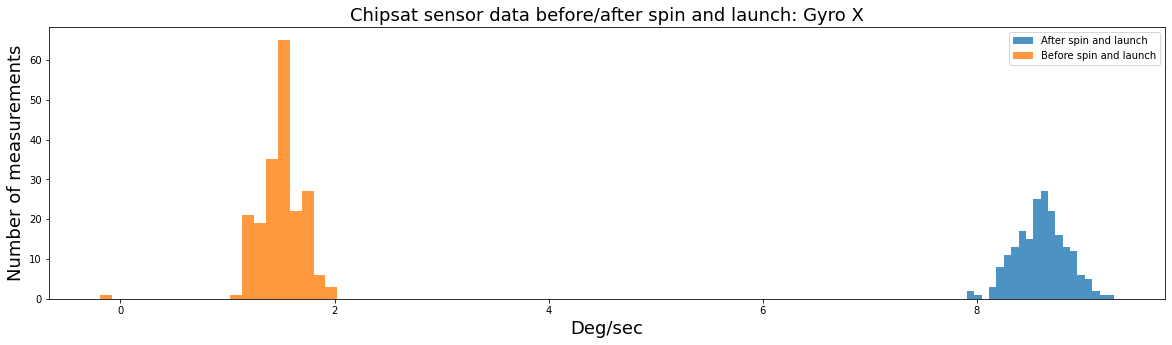

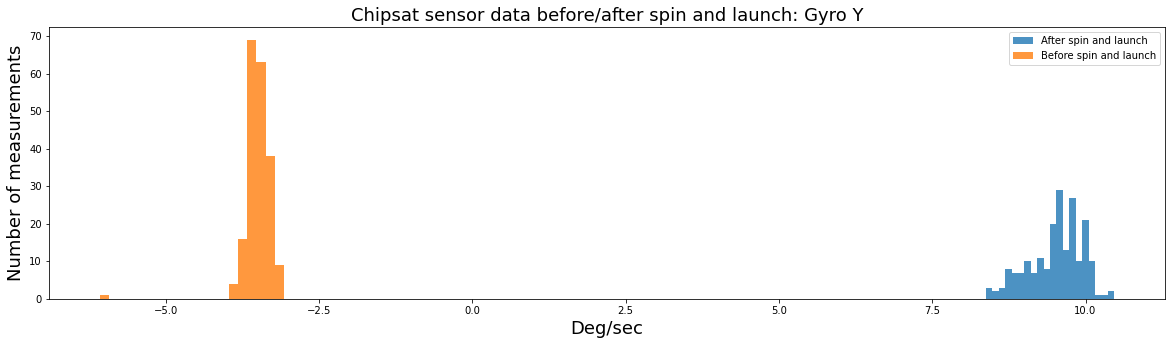

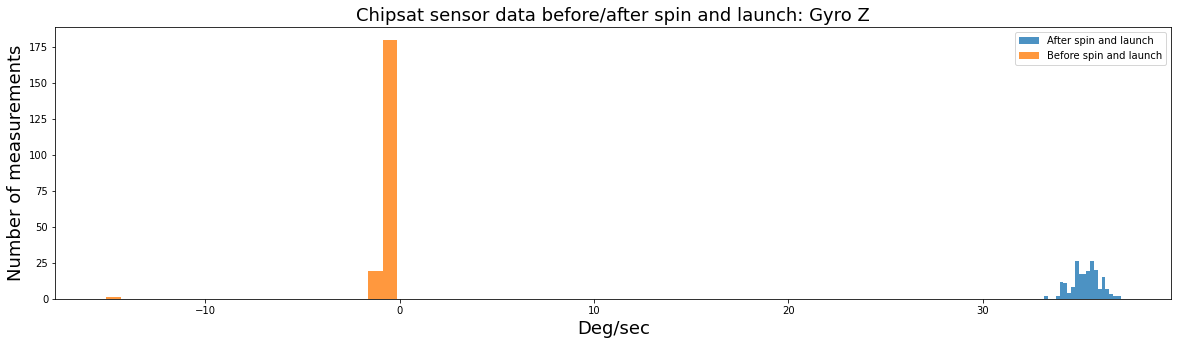

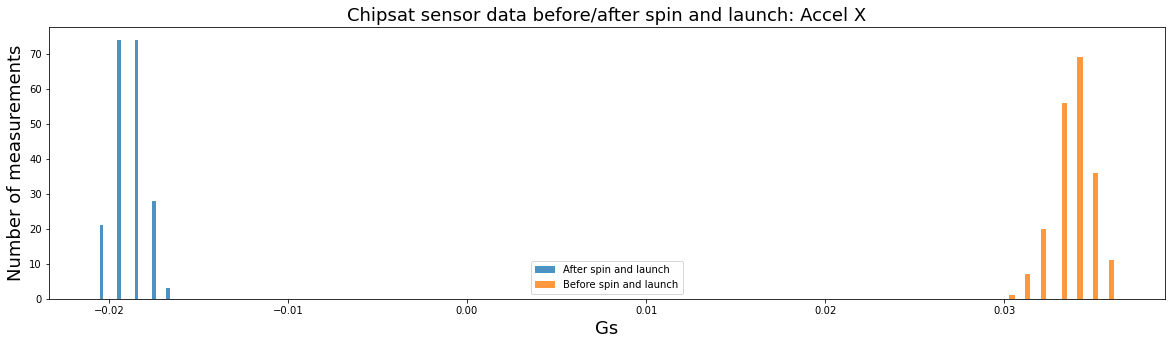

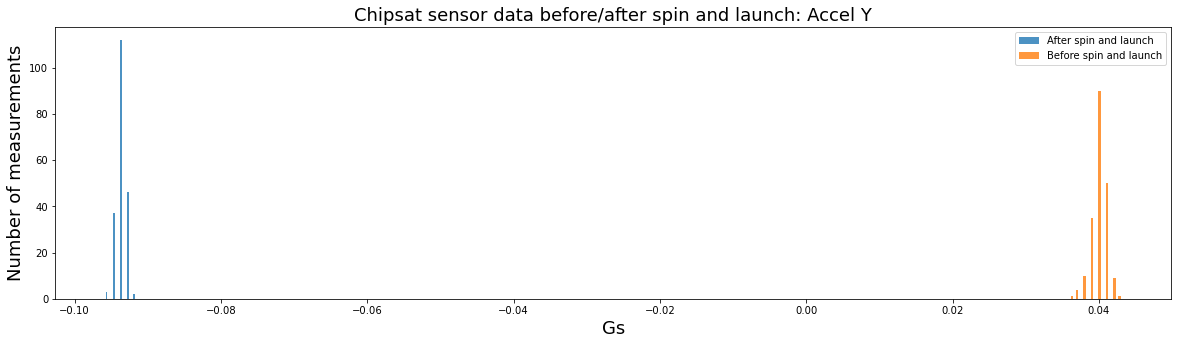

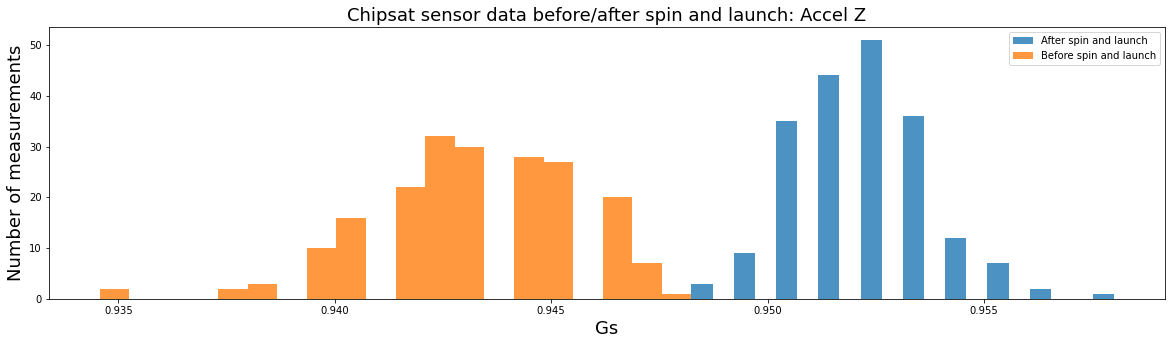

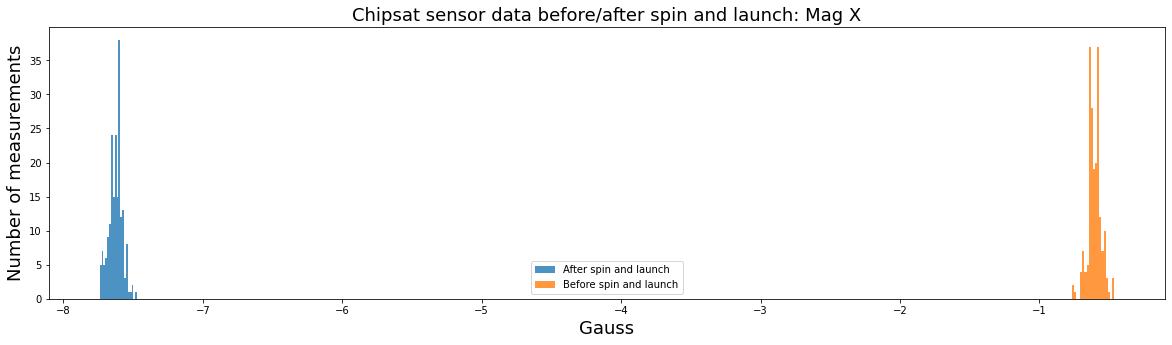

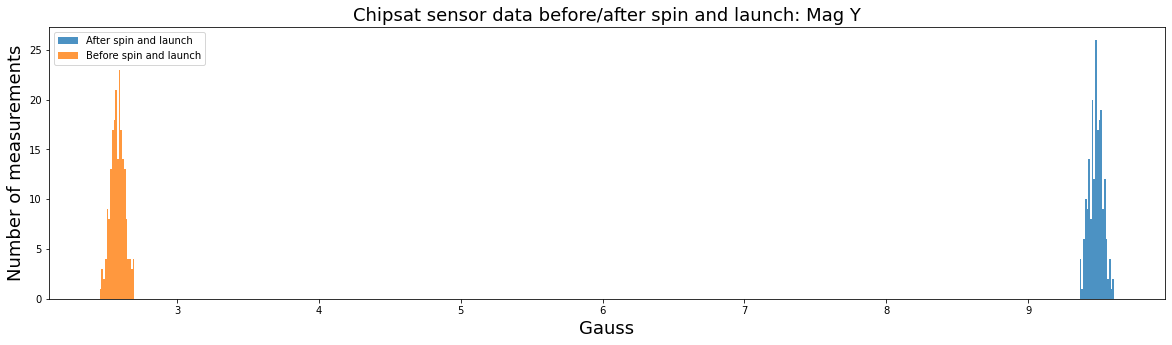

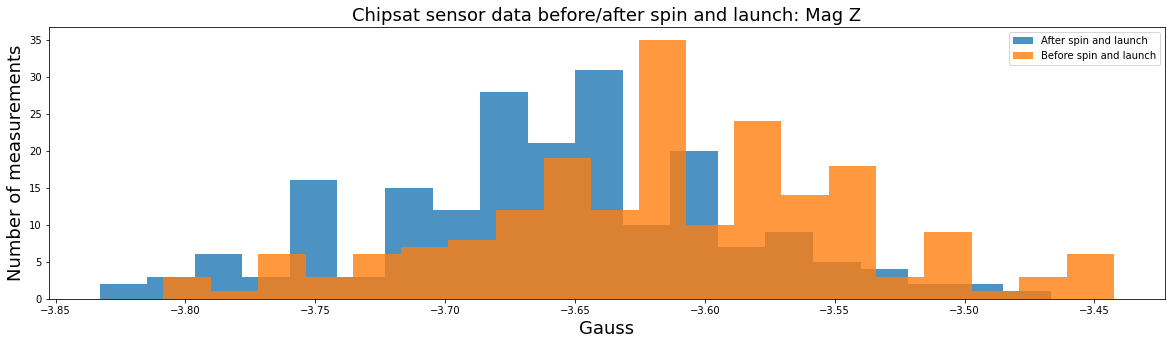

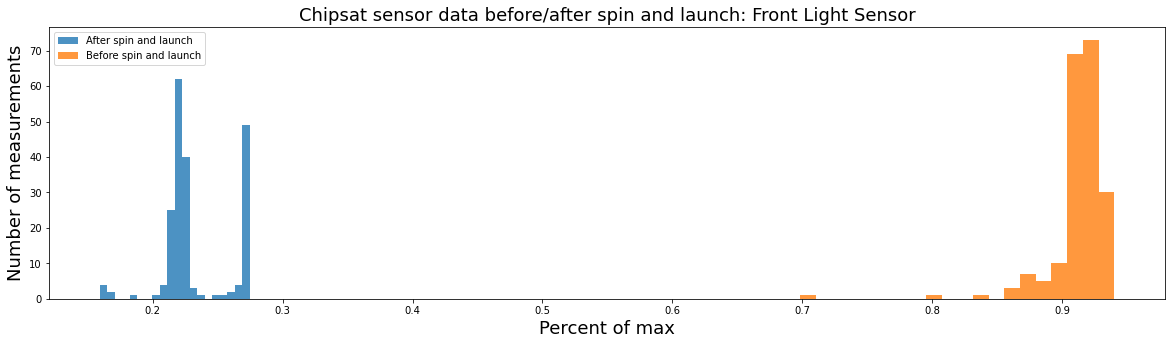

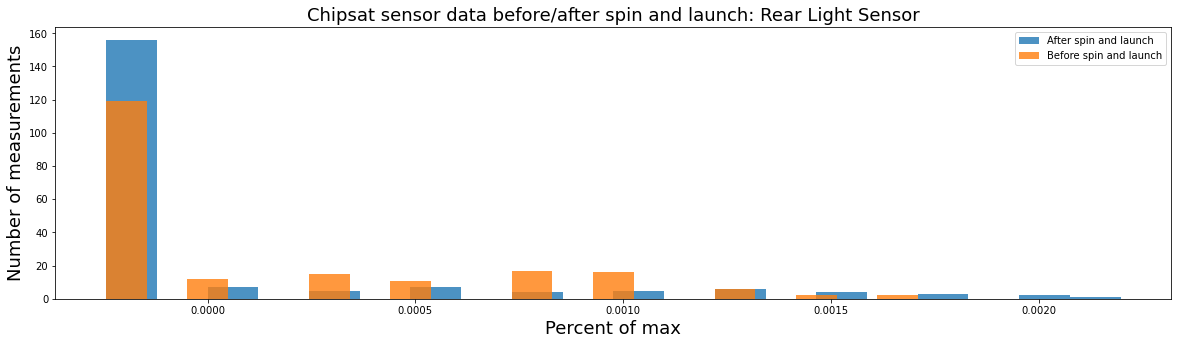

In [46]:
# Plot titles
data_label = ["Gyro X", "Gyro Y", "Gyro Z",
              "Accel X", "Accel Y", "Accel Z",
              "Mag X", "Mag Y", "Mag Z",
              "Front Light Sensor", "Rear Light Sensor"]

# Plot axis labels
axis_label = ["Deg/sec", "Deg/sec", "Deg/sec",
              "Gs", "Gs", "Gs",
              "Gauss", "Gauss", "Gauss",
              "Percent of max", "Percent of max"]

# Counter
count = 0

# Plot each dataset
for i in range(len(chipsat_12_posterior)):
    
    # Set figsize
    plt.figure(figsize=(20, 5))

    # Histogram
    plt.hist(chipsat_12_posterior[i][0:200], bins=20, alpha=0.8, label='After spin and launch')
    plt.hist(chipsat_12_prior[i], bins=20, alpha=0.8, label='Before spin and launch')

    # Plot configuration
    plt.title('Chipsat sensor data before/after spin and launch: '+data_label[count], fontsize=18)
    plt.xlabel(axis_label[count], fontsize=18)
    plt.ylabel('Number of measurements', fontsize=18)
    
    # Plot legend
    plt.legend(loc='best')

    # Show
    plt.show()
    
    # Increment counter
    count += 1

## A discussion of the day's events
<br><br>
<iframe width="560" height="315" src="https://www.youtube.com/embed/7RsmqJvfA2Y?start=72" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

***
***
***